# 초보자를 위한 빠른 시작

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 501kB 49.6MB/s 
     |████████████████████████████████| 4.3MB 47.5MB/s 


# 9주차 데이터 학습 모델 설계

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
# import 
import os
import pandas as pd 
import glob

In [18]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks/') # DataPath 설정 
current_path = os.getcwd() # 현재 폴더 위치 
train_path = current_path+ '/capstone_data/train' # 데이터 패스 설정 
print(train_path)

/content/gdrive/My Drive/Colab Notebooks/capstone_data/train


In [19]:
df = pd.read_json('./capstone_data/data_version_2.json')

In [ ]:
df

,tags,id,plylst_title,songs,like_cnt,updt_date,len,tag_len,songs2,song2_len
1,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,28,2,"[83116, 276692, 166267, 354465, 256598, 666852...",25
2,"[운동, 드라이브, Pop, 트로피컬하우스, 힐링, 기분전환, 2017, 팝, 트렌...",69252,2017 Pop Trend,"[418694, 222305, 96545, 135950, 304687, 457451...",435,2017-09-15 15:59:26.000,30,10,"[418694, 222305, 96545, 135950, 304687, 457451...",22
3,"[잔잔한, 추억, 회상]",36557,멍청이.. 내맘도 몰라.,"[496913, 632529, 501426, 515574, 411161, 10341...",5,2008-09-23 22:32:02.000,20,3,"[632529, 501426, 515574, 411161, 103411, 17813...",17
5,"[우울, 힐링, 힘내]",112060,지친 너를 위로해줄 제목편지 준비해봤어,"[449808, 691770, 640657, 313395, 697100, 34090...",1,2018-01-04 22:49:29.000,21,3,"[691770, 640657, 313395, 697100, 340905, 22169...",15
6,[비오는날],75342,"이렇게 비 내리는 날이면, 너도 내 생각 할까..","[379674, 164522, 33196, 281228, 640012, 117969...",17,2016-10-12 16:22:17.000,18,1,"[164522, 33196, 640012, 117969, 75425, 627363,...",15
...,...,...,...,...,...,...,...,...,...,...
45430,"[겨울, 설렘, 사랑]",133185,첫눈처럼 설레였던 그날♥,"[334564, 221618, 504089, 321512, 476845, 11368...",154,2014-12-24 14:25:23.000,25,3,"[334564, 221618, 476845, 113687, 211159, 51275...",21
45434,[팝],33486,들을수록 걸크러쉬 물씬 느껴지는 음악리스트,"[619719, 374517, 323561, 79157, 170970, 241952...",4,2017-03-18 00:07:08.000,29,1,"[619719, 374517, 323561, 79157, 241952, 587512...",17
45435,[인디],153220,오후의 어쿠스틱 vol.2,"[627005, 253230, 643932, 22659, 316149, 247137...",39,2013-04-19 01:36:45.000,21,1,"[627005, 253230, 643932, 22659, 316149, 247137...",20
45436,[여친],79538,여자친구 명곡,"[65053, 389127, 443914, 498028, 375431, 312296...",6,2018-03-09 14:24:37.000,23,1,"[65053, 389127, 443914, 498028, 375431, 312296...",23


In [ ]:
df.shape

(29354, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29354 entries, 1 to 45437
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tags          29354 non-null  object
 1   id            29354 non-null  int64 
 2   plylst_title  29354 non-null  object
 3   songs         29354 non-null  object
 4   like_cnt      29354 non-null  int64 
 5   updt_date     29354 non-null  object
 6   len           29354 non-null  int64 
 7   tag_len       29354 non-null  int64 
 8   songs2        29354 non-null  object
 9   song2_len     29354 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


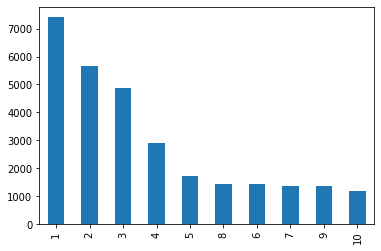

In [ ]:
df.tags.map(lambda x: len(x)).value_counts().plot.bar()

In [ ]:
df['songs2'].unique

<bound method Series.unique of 1        [83116, 276692, 166267, 354465, 256598, 666852...
2        [418694, 222305, 96545, 135950, 304687, 457451...
3        [632529, 501426, 515574, 411161, 103411, 17813...
5        [691770, 640657, 313395, 697100, 340905, 22169...
6        [164522, 33196, 640012, 117969, 75425, 627363,...
                               ...                        
45430    [334564, 221618, 476845, 113687, 211159, 51275...
45434    [619719, 374517, 323561, 79157, 241952, 587512...
45435    [627005, 253230, 643932, 22659, 316149, 247137...
45436    [65053, 389127, 443914, 498028, 375431, 312296...
45437    [287003, 408232, 625933, 543298, 222713, 10445...
Name: songs2, Length: 29354, dtype: object>

In [ ]:
# 태그 개수 세기

tag_cnt=set()
for i in df['tags']:
    for j in i:
        tag_cnt.add(j)

In [ ]:
type(tag_cnt)

set

In [ ]:
tag_cnt # 전체 태그

In [ ]:
len(tag_cnt) # 전체 태그 개수

1382

In [ ]:
# 음원 개수 세기

song_cnt=set()
for i in df['songs2']:
    for j in i:
        song_cnt.add(j)

In [ ]:
song_cnt

In [ ]:
len(song_cnt)

69888

# Latent Factor CF

In [ ]:
# [Tag x Song] Pivot Table 생성

In [ ]:
unique_tags = list(set([tag for tags in df.tags for tag in tags]))
unique_songs = list(set([song for songs in df.songs2 for song in songs]))

In [ ]:
df_pivot = pd.DataFrame(index=unique_tags, columns=unique_songs)

In [ ]:
df_pivot = df_pivot.fillna(0)

In [ ]:
for i, (tags, songs) in enumerate(zip(df.tags, df.songs2)):
    print(i) if i % 100 == 0 else ''
    df_pivot.loc[tags, songs] += 1

In [5]:
# pivot table 불러오기
df_pivot = pd.read_pickle('./capstone_data/pivot_songs_tags.pickle')

In [ ]:
df_pivot

,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
침대,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
로우파이,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
해외힙합,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
눈,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
감성적,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
싱그러운,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
자연,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
좋아요,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
베스트,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Matrix Factorization
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(df_pivot)
matrix

array([[ 8.44665819e+00, -1.67232584e+00,  6.22408217e+00, ...,
        -9.72193194e-02, -2.71869129e+00,  1.42412426e+00],
       [ 4.52844745e-01, -2.13146658e-01, -6.29828459e-04, ...,
         1.46720513e-01,  3.75484654e-02, -1.07053958e-01],
       [ 8.52527556e-01, -1.97132977e+00, -1.23814448e+00, ...,
         2.61895607e-01, -6.46654009e-01,  1.99194896e-01],
       ...,
       [ 6.98863879e+00, -2.39110515e+00, -2.52473873e+00, ...,
         1.03643648e-01, -1.30131315e+00, -2.54542954e-01],
       [ 2.71302008e+00, -2.02334694e+00, -1.54540296e+00, ...,
        -8.91277974e-02,  5.50246755e-01, -4.32275731e-01],
       [ 1.46522307e-01, -4.02586601e-01, -2.66572494e-01, ...,
        -5.39033581e-02,  3.26765013e-02, -9.92101642e-02]])

In [13]:
# 피어슨 상관계수 구하기
import numpy as np

In [15]:
corr = np.corrcoef(matrix)
corr

array([[1.        , 0.62157635, 0.24054841, ..., 0.60345612, 0.38194563,
        0.22048265],
       [0.62157635, 1.        , 0.38666211, ..., 0.5066307 , 0.40396863,
        0.38803415],
       [0.24054841, 0.38666211, 1.        , ..., 0.42685764, 0.58068323,
        0.80076875],
       ...,
       [0.60345612, 0.5066307 , 0.42685764, ..., 1.        , 0.86734418,
        0.54557665],
       [0.38194563, 0.40396863, 0.58068323, ..., 0.86734418, 1.        ,
        0.82921726],
       [0.22048265, 0.38803415, 0.80076875, ..., 0.54557665, 0.82921726,
        1.        ]])

In [ ]:
# heatmap 으로 표현
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(corr,annot=True,fmt='.1g')

In [ ]:
song_title = df_pivot.columns
song_title_list = list(song_title)
tag_title = df_pivot.index
tag_title_list = list(tag_title)
seed_tag = tag_title_list.index("기분")

In [ ]:
corr_seed_tag = corr[seed_tag]
list(tag_title[corr_seed_tag >= 0.9])[:50]

['만남', '기분', '주말', '여자', '바람', '함께', '일상', '업무']

In [6]:
# 태그 유사도를 바탕으로 곡을 추천하도록

import math
from itertools import combinations

In [7]:
NUM_SIM_TAG_TOPK = 2
num_item_rec_topk = 2

num_users = 1382

In [ ]:
# df_pivot.values
# matrix2 = df_pivot('rating')
#user_means = matrix.mean(axis=1)
df_pivot.stack().reset_index()

In [ ]:
df_pivot.index.name="tags"
df_pivot.columns.name="songs"
matrix=df_pivot
matrix
# df_pivot2 = pd.pivot_table(df_pivot, index=["tags"], columns=["songs"], values=[i for i in df_pivot.values])

In [10]:
user_means = df_pivot.mean(axis=1)
user_means

tags
침대      0.015038
로우파이    0.002461
해외힙합    0.003806
눈       0.042339
감성적     0.003277
          ...   
싱그러운    0.002146
자연      0.001359
좋아요     0.009844
베스트     0.004579
funk    0.001216
Length: 1382, dtype: float64

In [9]:
def get_similarity(user_id, other_id, matrix=matrix, user_means=user_means):
    intersect_ids = np.intersect1d(matrix.loc[user_id].dropna().index , matrix.loc[other_id].dropna().index)
    user_diff2_sum, other_diff2_sum, user_other_diff_sum = 0, 0, 0
    
    for item_id in intersect_ids:
        user_diff = matrix.loc[user_id, item_id] - user_means[user_id]
        other_diff = matrix.loc[other_id, item_id] - user_means[other_id]
        
        user_diff2_sum += user_diff ** 2
        other_diff2_sum += other_diff ** 2
        user_other_diff_sum += user_diff *  other_diff
    
    return user_other_diff_sum / math.sqrt(user_diff2_sum) / math.sqrt(other_diff2_sum)

user_corr_dict = {}
for x, y in combinations([*range(1,num_users+1)], 2):
    user_corr_dict[(x, y)] = get_similarity(x, y) 



NameError: ignored

In [ ]:
def get_similarity(tag_id, other_id, matrix=df_pivot, tag_means=tag_means):
    intersect_ids = np.intersect1d(matrix.loc[tag_id].dropna().index , matrix.loc[other_id].dropna().index)
    tag_diff2_sum, other_diff2_sum, tag_other_diff_sum = 0, 0, 0
    
    for song in intersect_ids:
        tag_diff = matrix.loc[tags, songs] - tag_means[tags]
        other_diff = matrix.loc[other_id, item_id] - user_means[other_id]
        
        user_diff2_sum += user_diff ** 2
        other_diff2_sum += other_diff ** 2
        user_other_diff_sum += user_diff *  other_diff
    
    return user_other_diff_sum / math.sqrt(user_diff2_sum) / math.sqrt(other_diff2_sum)

user_corr_dict = {}
for x, y in combinations([*range(1,num_users+1)], 2):
    user_corr_dict[(x, y)] = get_similarity(x, y) 


# LightGBM

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['tags']
y = df ['songs2']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
# lightGBM 데이터 모델 학습 

from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score

model_tags = LGBMRegressor(n_estimators=500);
model_tags.fit(X_train,y_train)
songs_pred = model_convention.predict(X_test)
y_test = np.expm1(y_test)
songs_pred = np.expm1(songs_pred)


ValueError: ignored

# SVD CF 다시

In [ ]:
import pandas as pd
import numpy as np
import math

# pivot table 불러오기
df_pivot.index.name="tags"
df_pivot.columns.name="songs"
df_pivot

In [ ]:
# pivot table 다시 만듬
unique_tags = list(set([tag for tags in df.tags for tag in tags]))
unique_songs = list(set([song for songs in df.songs2 for song in songs]))

In [ ]:
df_pivot2 = pd.DataFrame(index=unique_tags, columns=unique_songs)

In [ ]:
df_pivot2.index.name="tags"
df_pivot2.columns.name="songs"
df_pivot2

In [ ]:
def R_filled_in(df_pivot2):
    for col in range(len(df_pivot2.columns)):
        col_update=[]
        # 컬럼의 평균을 구한다.
        col_num = [i for i in df_pivot2.iloc[:,col] if math.isnan(i)==False]
        col_mean = sum(col_num)/len(col_num)
        
        # NaN을 가진 행은 위에서 구한 평균 값으로 채워준다.
        col_update = [i if math.isnan(i)==False else col_mean for i in df_pivot2.iloc[:,col]]

        # 리스트로 만든 업데이트된 한 컬럼을 기존에 데이터 프레임 컬럼에 새로 입혀준다.
        df_pivot2.iloc[:,col] = col_update
        
    return df_pivot2

In [ ]:
rating_R_filled = R_filled_in(df_pivot2)
rating_R_filled

ZeroDivisionError: ignored

# SVD CF 다시 2

In [ ]:
pip install sparsesvd

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sparsesvd import sparsesvd
import scipy
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import *
from sklearn.model_selection import train_test_split
%matplotlib inline

In [48]:
# pivot table 불러오기
df_pivot = pd.read_pickle('./capstone_data/pivot_songs_tags.pickle')

In [49]:
df_pivot.index.name='tags'
df_pivot.columns.name='songs'
df_pivot

songs,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
tags,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
침대,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
로우파이,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
해외힙합,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
눈,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
감성적,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
싱그러운,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
자연,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
좋아요,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
#Dividing each rating a user gave by the mean of each user's rating
tag_means = np.array(df_pivot.mean(axis = 1)).reshape(-1, 1)
df_pivot = df_pivot.div(df_pivot.mean(axis = 1), axis = 0)
df_pivot_matrix = df_pivot.to_numpy()

In [ ]:
tag_means

In [51]:
# SVD
#getting the U, S and Vt values
U, sigma, Vt = svds(df_pivot_matrix, k = 10)

In [52]:
#Sigma value above is outputed as an array, but we need it in the form of a diagonal matrix
sigma = np.diag(sigma)

In [54]:
#creating predictions
predicted = np.dot(np.dot(U, sigma), Vt)
predicted_ratings = np.dot(np.dot(U, sigma), Vt) * tag_means

In [55]:
predicted_ratings

array([[1.32494669, 0.0081647 , 0.69843468, ..., 0.64582276, 0.07841814,
        1.0026532 ],
       [0.4935746 , 0.00306086, 0.24888675, ..., 0.24366441, 0.03008602,
        0.40146166],
       [0.36260987, 0.00327067, 0.05035895, ..., 0.26589577, 0.04896971,
        0.86682932],
       ...,
       [2.04360247, 0.01244704, 1.02936451, ..., 0.991881  , 0.12117419,
        1.60041718],
       [2.22703955, 0.01406766, 1.13913893, ..., 1.11637018, 0.14031251,
        1.88306758],
       [0.66077957, 0.00393724, 0.29526298, ..., 0.32087389, 0.04071581,
        0.59207915]])

In [57]:
predicted_df = pd.DataFrame(predicted_ratings, columns= df_pivot.columns)
#Data frame index starts with 0 but original dataset starts with 1, so adding 1 to index
predicted_df.index = predicted_df.index + 1

In [58]:
predicted_df.head()

songs,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
1,1.324947,0.008165,0.698435,0.319054,-0.113347,0.696034,0.181199,0.290700,0.059492,0.098639,0.006001,1.697577,1.547232,1.040233,0.369679,0.281503,0.062002,1.477045,0.968656,0.376709,0.329754,0.006298,3.088243,2.203437,0.003793,1.522992,2.053150,0.060886,0.031382,5.231085,0.226791,3.377567,1.112820,1.437333,1.250427,0.002033,1.399851,0.145199,0.286183,1.070478,...,0.097723,0.009984,1.024586,-1.738400,0.006161,0.151776,0.057749,0.001297,0.617541,0.007373,12.886949,0.047775,1.097386,0.983344,0.261958,0.131035,0.415279,0.140674,0.839139,0.151672,0.265874,0.541405,0.006501,0.981732,0.000496,2.466591,0.298049,0.002249,0.272149,1.377914,0.016686,0.977367,0.001289,1.945368,1.322466,0.004561,1.291708,0.645823,0.078418,1.002653
2,0.493575,0.003061,0.248887,0.119820,-0.092898,0.267371,0.067807,0.110675,0.024092,0.034870,0.002352,0.614540,0.942221,0.415157,0.131337,0.107265,0.022876,0.552805,0.488724,0.148739,0.121673,0.002235,1.194792,0.813040,0.001344,0.712069,0.730213,0.027207,0.011098,1.864761,0.130933,1.260966,0.402908,0.522324,0.519104,0.000832,0.531584,0.047269,0.104417,0.383899,...,0.036689,0.003522,0.444153,-0.879653,0.002281,0.053395,0.021671,0.000466,0.248121,0.002743,4.917670,0.017003,0.409185,0.350136,0.095565,0.046060,0.144393,0.059319,0.304819,0.055025,0.120789,0.390930,0.002359,0.352073,0.000174,0.920523,0.099817,0.000833,0.097930,0.508065,0.006520,0.344404,0.000489,0.730272,0.501236,0.001668,0.395775,0.243664,0.030086,0.401462
3,0.362610,0.003271,0.050359,0.137166,-0.100397,0.309421,0.074314,0.165948,0.060900,-0.002608,0.004367,1.027574,7.572738,0.763307,0.052652,0.141364,0.016494,0.590616,3.124089,0.415091,0.095910,0.000067,1.763526,0.135095,-0.000015,3.457583,0.110262,0.108329,0.000447,0.444076,1.034699,0.711896,0.155955,0.347810,1.357892,0.002120,0.412465,0.001466,0.070707,0.075212,...,0.044950,-0.000007,1.604273,-0.585534,0.001824,0.001731,0.024769,0.000069,0.573217,0.002646,3.306589,0.000387,0.190511,0.088170,0.048537,-0.000260,-0.073105,0.188206,0.145850,0.017375,0.549579,4.098507,0.000904,0.074760,-0.000017,0.870094,0.110781,0.000752,0.046635,0.333932,0.012208,-0.073523,0.000695,0.755635,0.536245,0.001045,-0.105390,0.265896,0.048970,0.866829
4,1.819163,0.011443,0.991777,0.436748,0.051817,0.932083,0.254419,0.399574,0.079307,0.139927,0.008076,2.219901,1.340484,1.358754,0.575437,0.383800,0.086046,2.036236,1.111891,0.515641,0.454761,0.009151,4.158550,3.065958,0.005447,1.805249,3.023875,0.074149,0.045770,7.666434,0.223746,4.648601,1.525077,2.098244,1.563169,0.002683,1.873076,0.211836,0.415876,1.516431,...,0.137130,0.014675,1.288459,-1.758482,0.008600,0.221365,0.079352,0.001853,0.823154,0.009984,17.082034,0.068907,1.492982,1.426651,0.375555,0.194083,0.592410,0.181132,1.197114,0.214687,0.321000,0.406501,0.009214,1.405204,0.000737,3.436559,0.452693,0.003196,0.383061,1.936293,0.022335,1.431231,0.001754,2.673495,1.848620,0.006400,1.898994,0.894692,0.107989,1.314913
5,1.518707,0.009910,0.841888,0.395216,-0.293127,0.825056,0.220588,0.358609,0.073085,0.121655,0.007326,2.405405,1.766802,1.205456,0.455779,0.342096,0.075972,1.781438,1.173591,0.427877,0.404712,0.007669,3.664528,2.531508,0.004658,1.832040,2.466161,0.071680,0.038146,6.296941,0.281316,3.957605,1.338853,1.725291,1.503306,0.002439,1.617407,0.208831,0.346898,1.308759,...,0.118148,0.012185,1.220032,-3.098574,0.007466,0.186364,0.071530,0.001574,0.747930,0.009126,14.580356,0.057215,1.275478,1.211505,0.316836,0.157871,0.510169,0.171722,1.004177,0

In [73]:
#creating function to get recommendations, 코드 원상태
def svd_recommender(df_predict, user, umr, number_recomm):
    user_predicted_movies = df_predict.loc[user, :].sort_values(ascending = False)
    original_data = umr.loc[user, :].sort_values(ascending = False)
    already_rated = user_movies.loc[user, :].dropna()
    unrated = list(user_movies.loc[1, pd.isnull(user_movies.loc[user, :])].index)
    
    recommendations = df_predict.loc[user][unrated]
    
    recommendations = pd.DataFrame(recommendations.sort_values(ascending = False).index[:number_recomm])
    
    return recommendations, already_rated

In [74]:
#getting values for tag 카페
recommend_cafe, rated_cafe = svd_recommender(predicted_df, '카페' , df_pivot, 10)

KeyError: ignored

In [68]:
df_pivot.loc['카페']

songs
262145    0
393217    0
393222    0
10        1
524300    0
         ..
262130    0
262138    0
262140    0
262142    0
131071    1
Name: 카페, Length: 69888, dtype: int64